In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from geopy.extra.rate_limiter import RateLimiter
import folium
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train_boston.csv')
data.head()

,index,id,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,...,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,...,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,...,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,...,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,...,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950


### 1. DATA CLEANING AND REVIEWING:

#### Results found:
#### 1. No nulls/Nans found 
#### 2. 'data' column typo


In [3]:
data.dtypes

index               int64
 id                 int64
 data              object
 bedrooms           int64
 bathrooms        float64
 sqft_living        int64
 sqft_lot           int64
 floors           float64
 waterfront         int64
 view               int64
 condition          int64
 grade              int64
 sqft_above         int64
 sqft_basement      int64
 yr_built           int64
 yr_renovated       int64
 zip_code           int64
 lat              float64
 lon              float64
 sqft_living15      int64
 sqft_lot15         int64
 price              int64
dtype: object

In [4]:
data.isna().sum()
data.isnull().sum()

index             0
 id               0
 data             0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 grade            0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 zip_code         0
 lat              0
 lon              0
 sqft_living15    0
 sqft_lot15       0
 price            0
dtype: int64

In [5]:
data.columns = data.columns.str.lower() # lower case
data.columns = map(lambda x : x.replace('-', '_').replace(' ', ''), data.columns) 
data.rename(columns = {'data':'date'}, inplace = True) 
data.head()

,index,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,...,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,...,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,...,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,...,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,...,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950


In [6]:
data1 = data.copy()

In [7]:
data1.drop('id', axis='columns', inplace=True)

In [8]:
data1.drop('index', axis='columns', inplace=True)
data1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,9/23/14,2,1.50,1620,1444,2.0,0,0,3,9,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,6/20/14,3,2.75,2470,10125,2.0,0,0,3,8,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,4/25/15,2,1.00,1140,7435,1.0,0,0,3,7,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,5/6/15,3,1.00,1460,6198,1.5,0,0,4,7,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,9/24/14,2,1.00,670,6720,1.0,0,0,5,6,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950


In [9]:
data1['date'] = pd.to_datetime(data1['date'])
data1.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zip_code                  int64
lat                     float64
lon                     float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [10]:
data['bedrooms'].value_counts()

3     7771
4     5572
2     2212
5     1302
6      216
1      151
7       33
8       10
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
data1 = data1[data1['bedrooms'] < 8]
data1['bedrooms'].value_counts()

3    7771
4    5572
2    2212
5    1302
6     216
1     151
7      33
Name: bedrooms, dtype: int64

In [12]:
# data1['price_per_sqft_living'] = data1['price'] / data1['sqft_living']

In [13]:
# data1['price_per_sqft_lot'] = data1['price'] / data1['sqft_lot']

In [14]:
'''bin_labels_5 = [0,1,2,3,4]
data1['price_range'] = pd.qcut(data1['price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
data1.isna().sum()'''

"bin_labels_5 = [0,1,2,3,4]\ndata1['price_range'] = pd.qcut(data1['price'],\n                              q=[0, .2, .4, .6, .8, 1],\n                              labels=bin_labels_5)\ndata1.isna().sum()"

### HARDCODE ZIPCODE RANKING 

In [15]:
''' ranking_zipcode = []
                                                 
for x in data1['zip_code']:
    if x == 98039:
        ranking_zipcode.append(5)
    elif x == 98004:
        ranking_zipcode.append(4)
    elif x == 98040:
        ranking_zipcode.append(3)
    elif x == 98112:
        ranking_zipcode.append(2)
    elif x == 98102:
        ranking_zipcode.append(1)
    else:
        ranking_zipcode.append(0)
data1['ranking_zipcode'] = ranking_zipcode
data1.head() ''' 

" ranking_zipcode = []\n                                                 \nfor x in data1['zip_code']:\n    if x == 98039:\n        ranking_zipcode.append(5)\n    elif x == 98004:\n        ranking_zipcode.append(4)\n    elif x == 98040:\n        ranking_zipcode.append(3)\n    elif x == 98112:\n        ranking_zipcode.append(2)\n    elif x == 98102:\n        ranking_zipcode.append(1)\n    else:\n        ranking_zipcode.append(0)\ndata1['ranking_zipcode'] = ranking_zipcode\ndata1.head() "

In [16]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [17]:
# data1['price_range'].value_counts()

In [18]:
# data1['price_range'] = data1['price_range'].astype('int64')

In [19]:
categories = pd.DataFrame(data1['zip_code'].value_counts())
categories.columns = ['counts']
categories

,counts
98103,497
98038,473
98052,473
98115,455
98042,454
...,...
98102,81
98010,81
98024,64
98148,51


### Generate Map with Location of all houses 

In [20]:
''' map1 = folium.Map(
    location=[47.5892,-122.309],
    tiles='cartodbpositron',
    zoom_start=12,
)
data1.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]]).add_to(map1), axis=1)
map1 ''' 

' map1 = folium.Map(\n    location=[47.5892,-122.309],\n    tiles=\'cartodbpositron\',\n    zoom_start=12,\n)\ndata1.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]]).add_to(map1), axis=1)\nmap1 '

In [21]:
data1['date_month']= data1['date'].dt.month
data1['date_month']

0         9
1         6
2         4
3         5
4         9
         ..
17271    12
17272     4
17273     5
17274     5
17275    12
Name: date_month, Length: 17257, dtype: int64

In [22]:
data1['date_year']= data1['date'].dt.year

In [23]:
 # data1['years_since_renovation'] = data1['date_year'] - data1['yr_renovated']
data1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price,date_month,date_year
0,2014-09-23,2,1.50,1620,1444,2.0,0,0,3,9,...,2007,0,98144,47.5892,-122.309,1660,1642,525000,9,2014
1,2014-06-20,3,2.75,2470,10125,2.0,0,0,3,8,...,1960,2012,98040,47.5651,-122.223,2290,10125,970500,6,2014
2,2015-04-25,2,1.00,1140,7435,1.0,0,0,3,7,...,1952,1990,98125,47.7300,-122.310,1320,9385,327000,4,2015
3,2015-05-06,3,1.00,1460,6198,1.5,0,0,4,7,...,1916,0,98107,47.6626,-122.361,2280,5160,775000,5,2015
4,2014-09-24,2,1.00,670,6720,1.0,0,0,5,6,...,1942,0,98126,47.5151,-122.372,710,6720,304950,9,2014


In [24]:
data1 = data1.reset_index(drop=True)


In [25]:
''' for row in range(len(data1['years_since_renovation'])):
    if data1['years_since_renovation'][row] == data1['date_year'][row]:
        data1['years_since_renovation'][row] =  0
        
data1.head()
'''

" for row in range(len(data1['years_since_renovation'])):\n    if data1['years_since_renovation'][row] == data1['date_year'][row]:\n        data1['years_since_renovation'][row] =  0\n        \ndata1.head()\n"

In [26]:
''' def drop_2015_2014(x): 
    if (x == 2014) | (x == 2015): 
        return 0
    else:
        return x
data1['years_since_renovation'] = data1['years_since_renovation'].apply(drop_2015_2014)

data1.head() '''

" def drop_2015_2014(x): \n    if (x == 2014) | (x == 2015): \n        return 0\n    else:\n        return x\ndata1['years_since_renovation'] = data1['years_since_renovation'].apply(drop_2015_2014)\n\ndata1.head() "

In [27]:
data2 = data1.copy()
data2.shape

(17257, 22)

In [28]:
X_num_exp = data2.select_dtypes(np.number)
X_num_exp.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code', 'lat', 'lon',
       'sqft_living15', 'sqft_lot15', 'price', 'date_month', 'date_year'],
      dtype='object')

In [29]:
X_num_exp.shape

(17257, 21)

In [30]:
expensive_houses = X_num_exp.loc[X_num_exp['price'] >= 650000]


expensive_houses.shape

(4236, 21)

In [31]:
corr_matrix = expensive_houses.corr()

x = corr_matrix[["price"]]
x

,price
bedrooms,0.208203
bathrooms,0.467714
sqft_living,0.615326
sqft_lot,0.026336
floors,0.125553
waterfront,0.308306
view,0.335877
condition,-0.005770
grade,0.510642
sqft_above,0.471199


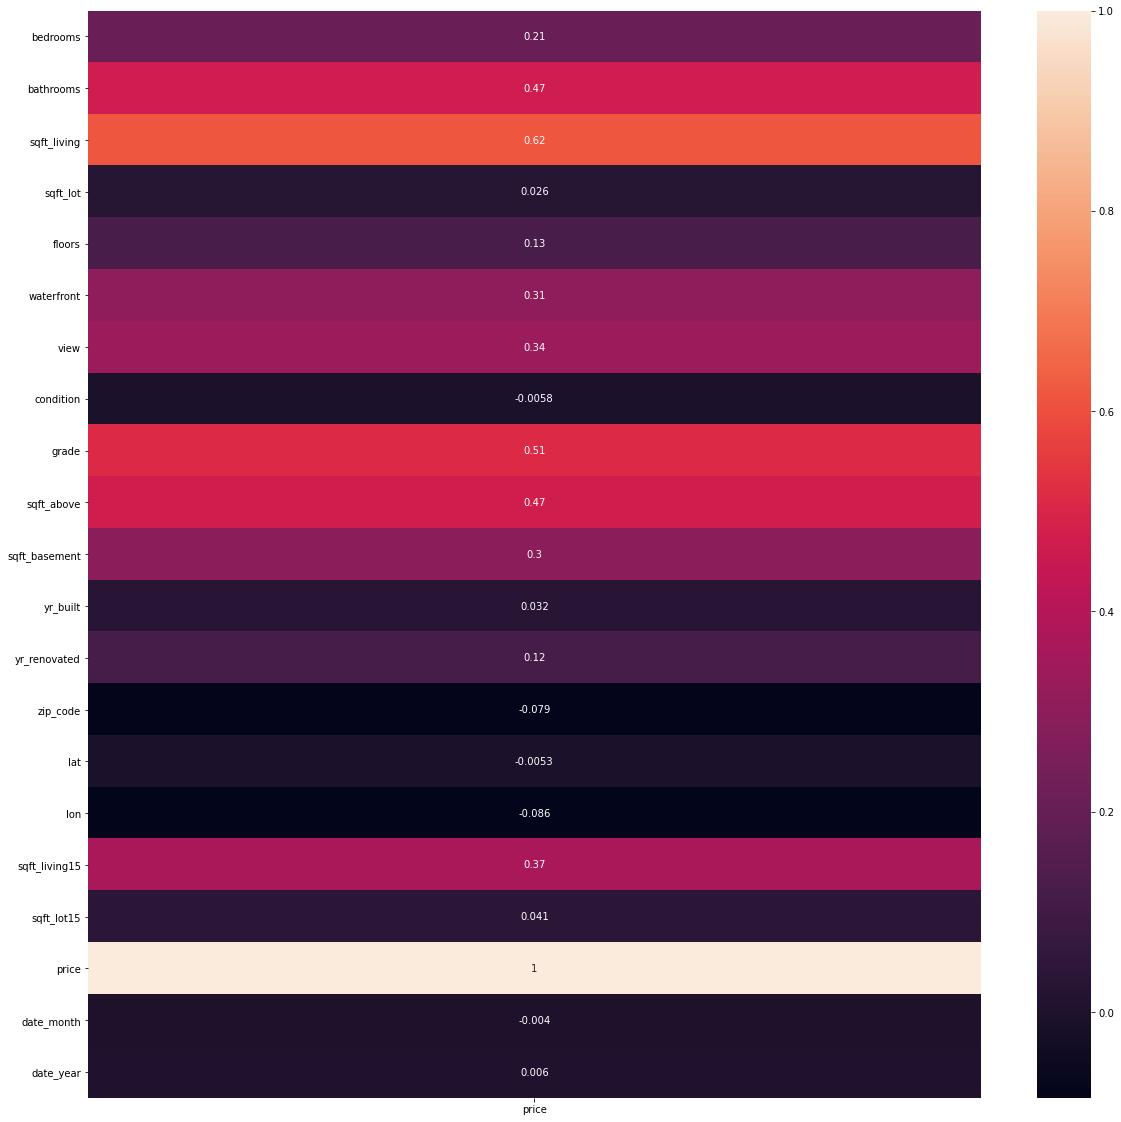

In [32]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(x[['price']], annot=True)
plt.show()

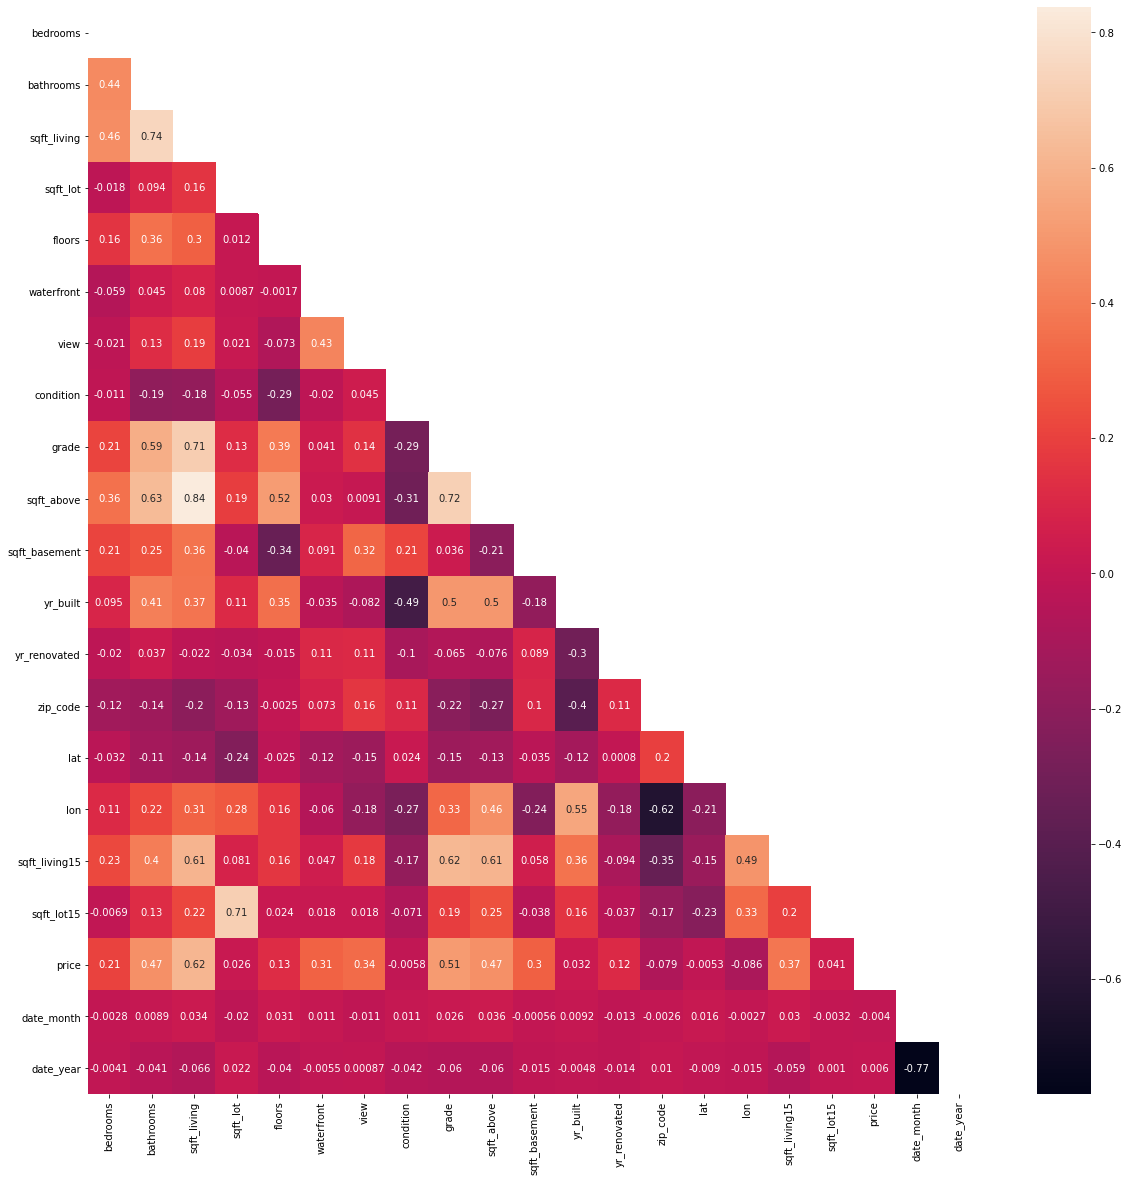

In [33]:
mask = np.zeros_like(expensive_houses.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(expensive_houses.corr(), mask=mask, annot=True)
plt.show()

In [34]:
# data1 = data1[data1['price'] < 4000000]

In [35]:
X_num = data1.select_dtypes(np.number)
''' def obj_plotter(data):
    obj = list(data.select_dtypes(include=['number']).columns)
    for col in obj:
        my_data = data[col].value_counts().reset_index()
        ax = sns.barplot(x=col, y='index', data = my_data).set_title(col.upper())
        plt.figure()
obj_plotter(X_num)'''
X_num.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code', 'lat', 'lon',
       'sqft_living15', 'sqft_lot15', 'price', 'date_month', 'date_year'],
      dtype='object')

## Hist Plot

In [36]:
''' for column in X_num.columns:
    sns.histplot(X_num[column])
    plt.show() ''' 

' for column in X_num.columns:\n    sns.histplot(X_num[column])\n    plt.show() '

## Box Plot

<function matplotlib.pyplot.show(*args, **kw)>

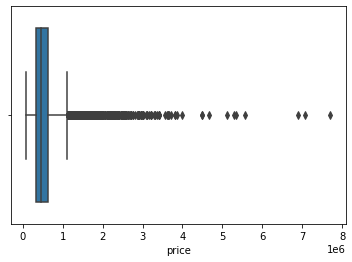

In [37]:
    sns.boxplot(X_num['price'])
    plt.show

In [38]:
''' mask = np.zeros_like(X_num.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(X_num.corr(), mask=mask, annot=True)
plt.show() ''' 

' mask = np.zeros_like(X_num.corr())\n\nmask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix\n\nfig, ax = plt.subplots(figsize=(20, 20))\nax = sns.heatmap(X_num.corr(), mask=mask, annot=True)\nplt.show() '

In [39]:
X_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bedrooms,17257.0,3.373298,0.889829,1.0000,3.0000,3.0000,4.0000,7.000000e+00
bathrooms,17257.0,2.116112,0.765535,0.5000,1.7500,2.2500,2.5000,8.000000e+00
sqft_living,17257.0,2082.342933,922.661663,370.0000,1420.0000,1910.0000,2550.0000,1.354000e+04
sqft_lot,17257.0,15094.512604,41493.982120,520.0000,5030.0000,7600.0000,10698.0000,1.651359e+06
floors,17257.0,1.497363,0.541301,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront,17257.0,0.007649,0.087126,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,17257.0,0.233586,0.768506,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition,17257.0,3.406560,0.648434,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,17257.0,7.660312,1.178218,3.0000,7.0000,7.0000,8.0000,1.300000e+01
sqft_above,17257.0,1790.005853,829.866576,370.0000,1190.0000,1570.0000,2210.0000,9.410000e+03


In [40]:
X = X_num.drop(['price' , 'zip_code'], axis=1)
y = X_num['price']
X.shape

(17257, 19)

In [41]:
Xe = expensive_houses.drop(['price' , 'zip_code'], axis=1)
ye = expensive_houses['price']
Xe.shape

(4236, 19)

In [42]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'lon',
       'sqft_living15', 'sqft_lot15', 'date_month', 'date_year'],
      dtype='object')

In [43]:

def model_function_linear(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    return r2_score(y_test, predictions), 1 - (1-r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)

scores_linear = model_function_linear(X, y)
scores_linear

(0.6930890567213738,
 0.6913899576764164,
 125435.99026188182,
 212436.03006200964,
           true          pred          resid
 15526   395000  4.461375e+05   51137.455656
 15633   456500  4.999771e+05   43477.054159
 10691   387000  3.189750e+05   68024.969565
 3124    260000  1.548208e+05  105179.203742
 11895   585000  6.680139e+05   83013.886321
 13362   919204  9.247477e+05    5543.703005
 15892  1700000  1.023466e+06  676534.055185
 4980    102500  6.134167e+04   41158.333912
 15441   569500  5.362527e+05   33247.345966
 16189   380000  4.524644e+05   72464.392736)

In [44]:

def model_function_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    knn = KNeighborsRegressor(n_neighbors=9)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    return knn.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_knn = model_function_knn(X, y)
scores_knn

    

(0.510144811692953,
 156713.79725119096,
 268383.52085114154,
           true            pred          resid
 15526   395000   598166.666667  203166.666667
 15633   456500   437412.222222   19087.777778
 10691   387000   551688.888889  164688.888889
 3124    260000   283055.555556   23055.555556
 11895   585000   542416.666667   42583.333333
 13362   919204  1000000.000000   80796.000000
 15892  1700000   865814.000000  834186.000000
 4980    102500   245344.444444  142844.444444
 15441   569500   494544.444444   74955.555556
 16189   380000   373544.444444    6455.555556)

### RANDOM FOREST + FEATURE IMPORTANCE


#### 1. EXPENSIVE HOUSES DATA FRAME (PRICE >= 650,000)

(0.7952818675147095,
 139045.58450471697,
 240499.99075372246,
           true        pred      resid
 15085   664000   767872.63  103872.63
 1807    905000   935279.50   30279.50
 1817    833450  1051394.50  217944.50
 6650   1850000  1389550.00  460450.00
 7511    980000  1036398.00   56398.00
 14984   987000  1072678.00   85678.00
 16742   715000   782036.29   67036.29
 14453  3300000  2512250.00  787750.00
 11188   789000  1061866.12  272866.12
 6922   2000000  1339154.50  660845.50)

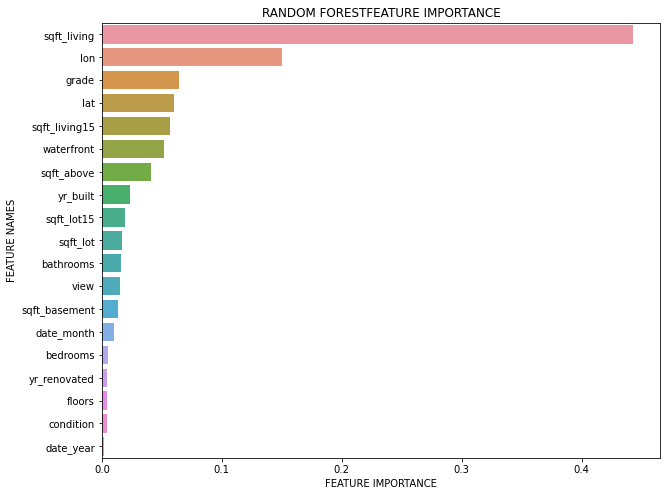

In [45]:
from sklearn.ensemble import RandomForestRegressor

def model_function_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    plot_feature_importance(reg.feature_importances_,X_train.columns,'RANDOM FOREST')
    return reg.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_random_forest = model_function_random_forest(Xe, ye)
scores_random_forest

### 2. FULL DATA FRAME: 
#### a) RANDOM FOREST REGRESSOR

(0.8854977890506237,
 72865.33778099652,
 129756.44133510775,
           true        pred      resid
 15526   395000   356253.04   38746.96
 15633   456500   483263.45   26763.45
 10691   387000   437726.50   50726.50
 3124    260000   317317.50   57317.50
 11895   585000   630208.49   45208.49
 13362   919204  1078983.07  159779.07
 15892  1700000  1409103.04  290896.96
 4980    102500   208828.09  106328.09
 15441   569500   588695.00   19195.00
 16189   380000   380111.50     111.50)

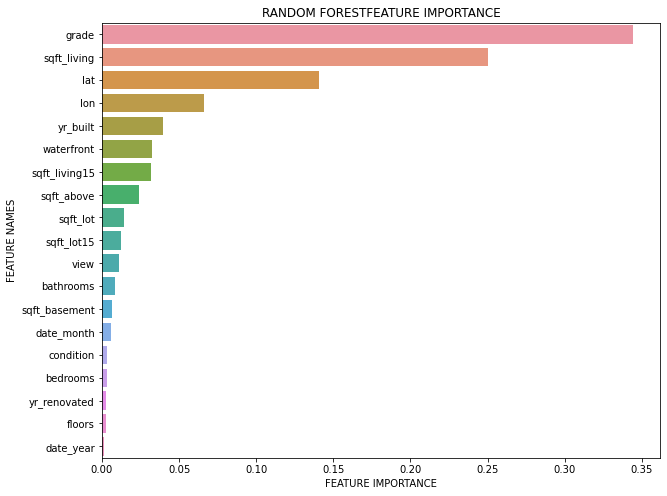

In [46]:
from sklearn.ensemble import RandomForestRegressor

def model_function_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    plot_feature_importance(reg.feature_importances_,X_train.columns,'RANDOM FOREST')
    return reg.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_random_forest = model_function_random_forest(X, y)
scores_random_forest

#### b) MLPRegressor 

In [47]:
from sklearn.neural_network import MLPRegressor

def model_function_MPL(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    mpl = MLPRegressor()
    mpl.fit(X_train, y_train)
    predictions = mpl.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    x = results['resid'].sort_values(ascending=False )
    display(x.head())
    return mpl.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_MPL = model_function_MPL(X, y)
scores_MPL

9791     4.191992e+06
15192    3.048654e+06
16782    2.200909e+06
2827     2.186043e+06
7624     1.988783e+06
Name: resid, dtype: float64

(0.5445703156592312,
 166290.21525634246,
 258781.16093573446,
           true           pred          resid
 15526   395000  730309.748038  335309.748038
 15633   456500  310617.390071  145882.609929
 10691   387000  372942.588912   14057.411088
 3124    260000  224633.216931   35366.783069
 11895   585000  468908.108213  116091.891787
 13362   919204  881528.305896   37675.694104
 15892  1700000  967959.579060  732040.420940
 4980    102500  152152.516411   49652.516411
 15441   569500  505995.545787   63504.454213
 16189   380000  404855.370774   24855.370774)

#### c) XGBOOST REGRESSOR

In [48]:
# !pip install xgboost

In [49]:
from xgboost import XGBRegressor

def model_function_xgb(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    predictions = xgb.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    x = results['resid'].sort_values(ascending=False )
    display(x.head())
    return xgb.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_xgb = model_function_xgb(X, y)
scores_xgb

17205    2226311.0
4051     1802911.0
9791     1770026.0
8874     1283481.0
2827     1099126.5
Name: resid, dtype: float64

(0.8933149352553882,
 68734.33056470887,
 125248.86598685541,
           true          pred         resid
 15526   395000  3.188074e+05   76192.56250
 15633   456500  4.829555e+05   26455.46875
 10691   387000  3.903453e+05    3345.28125
 3124    260000  2.743578e+05   14357.78125
 11895   585000  6.772319e+05   92231.93750
 13362   919204  1.002423e+06   83219.18750
 15892  1700000  1.534657e+06  165343.12500
 4980    102500  1.768425e+05   74342.53125
 15441   569500  4.839170e+05   85583.03125
 16189   380000  3.779468e+05    2053.15625)

### 3. SCALE DATA AND TEST MODEL

In [50]:
''' from sklearn.preprocessing import Normalizer
def normalizer_transform(data): 
    transformer = Normalizer().fit(data)
    nums_norm = pd.DataFrame(transformer.transform(data), columns=data.columns)
    return nums_norm '''

' from sklearn.preprocessing import Normalizer\ndef normalizer_transform(data): \n    transformer = Normalizer().fit(data)\n    nums_norm = pd.DataFrame(transformer.transform(data), columns=data.columns)\n    return nums_norm '

In [51]:
from sklearn.preprocessing import StandardScaler
def stdscaler_transform(data): 
    transformer = StandardScaler().fit(data)
    nums_scaled = pd.DataFrame(transformer.transform(data), columns=data.columns)
    return nums_scaled

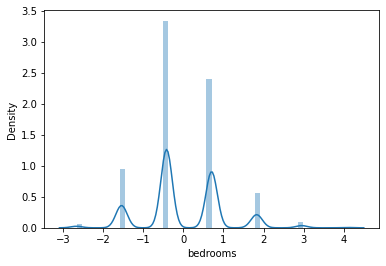

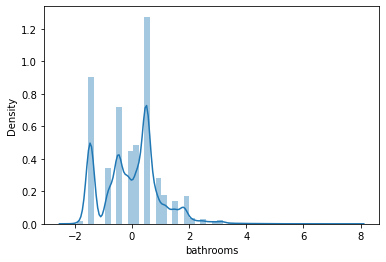

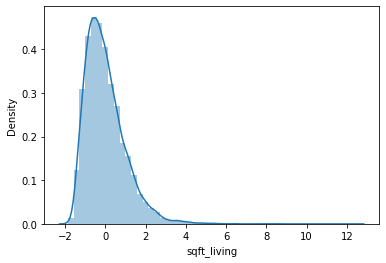

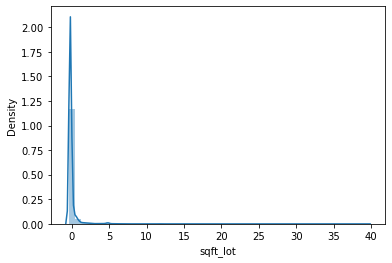

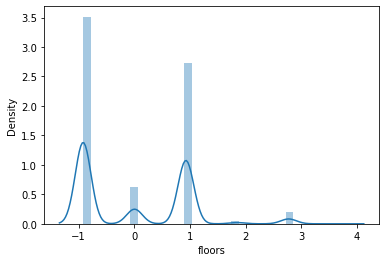

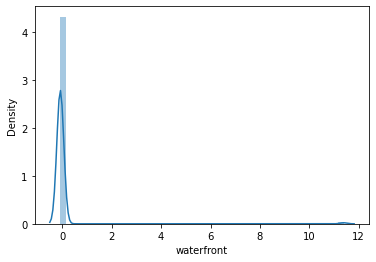

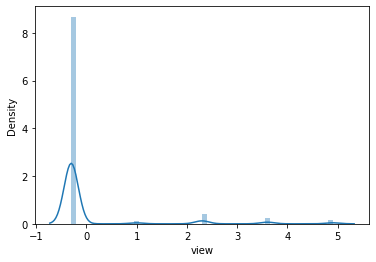

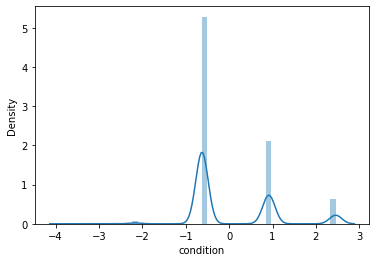

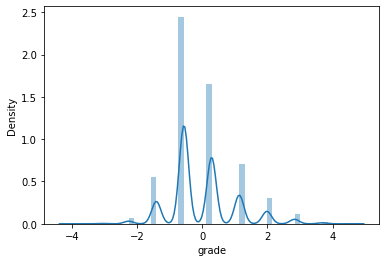

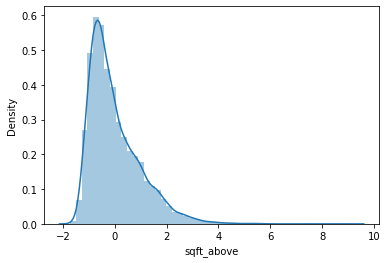

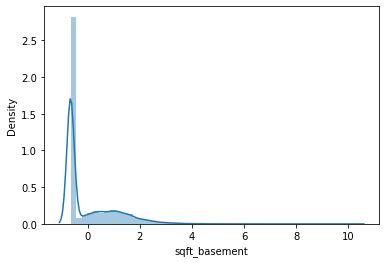

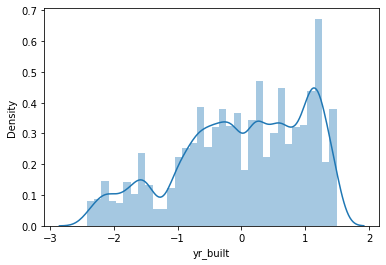

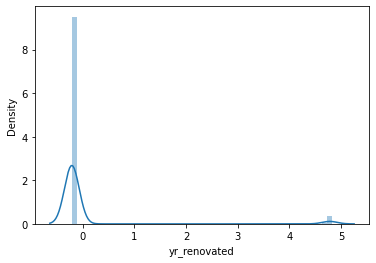

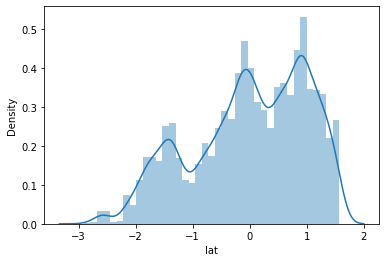

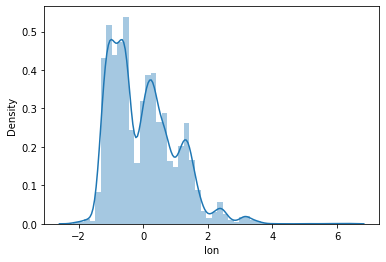

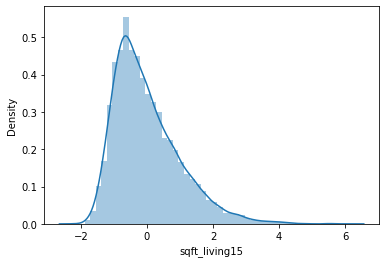

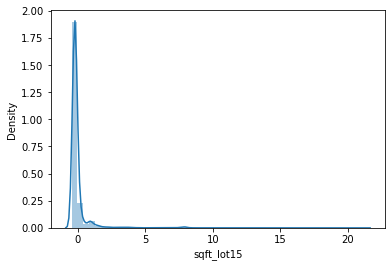

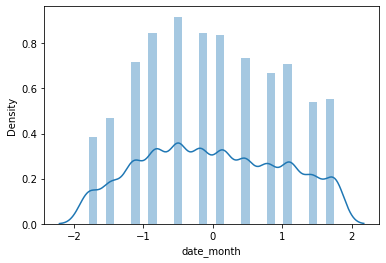

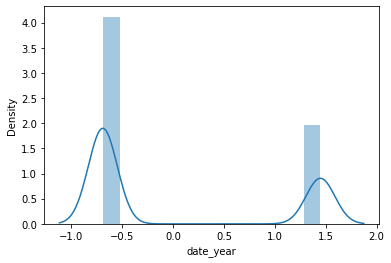

In [52]:
Xsc = stdscaler_transform(X_num.drop(['price', 'zip_code'], axis=1))
ysc = X_num['price']

for column in Xsc.columns:
    sns.distplot(Xsc[column])
    plt.show()

(0.889795120954649,
 71230.98320683662,
 135220.2198053535,
           true        pred      resid
 16861   500000   456322.10   43677.90
 9750    290000   270898.75   19101.25
 19      450500   412581.04   37918.96
 11346  1170000  1039626.00  130374.00
 10347   337000   352497.50   15497.50
 9002    410000   442011.80   32011.80
 4973    450000   541846.16   91846.16
 17232   394250   370728.00   23522.00
 11014   315000   322084.58    7084.58
 59      420000   338236.45   81763.55)

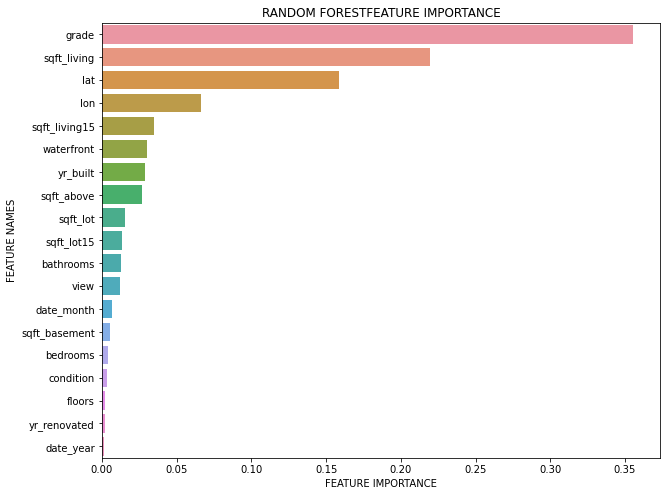

In [53]:
from sklearn.ensemble import RandomForestRegressor

def model_function_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    plot_feature_importance(reg.feature_importances_,X_train.columns,'RANDOM FOREST')
    return reg.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_random_forest = model_function_random_forest(Xsc, ysc)
scores_random_forest

In [54]:

def model_function_linear(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    return r2_score(y_test, predictions), 1 - (1-r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)

scores_linear = model_function_linear(Xsc, ysc)
scores_linear

(0.6929909843985417,
 0.691291342412403,
 130858.69196335497,
 225692.3252574602,
           true          pred          resid
 16861   500000  2.721513e+05  227848.685774
 9750    290000  2.616026e+05   28397.374585
 19      450500  4.792590e+05   28758.952601
 11346  1170000  1.117064e+06   52935.578852
 10347   337000  4.278890e+05   90888.976838
 9002    410000  6.506542e+05  240654.178606
 4973    450000  4.351727e+05   14827.277940
 17232   394250  5.936145e+05  199364.511652
 11014   315000  4.506646e+05  135664.571125
 59      420000  4.692881e+05   49288.083661)